<a href="https://colab.research.google.com/github/Ragnarok540/the-theory-and-technique-of-electronic-music/blob/main/Sinusoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sinusoids, Amplitude and Frequency

In [ ]:
import numpy as np
from IPython.display import Audio

def sinusoid(frequency, duration, frame_rate=44100):
  num_samples = frame_rate * duration
  time = np.linspace(0, duration, num_samples)
  angular_frequency = 2 * np.pi * frequency
  signal = np.sin(angular_frequency * time)
  return signal

signal_440 = sinusoid(440, 2)

Audio(signal_440, rate=44100)

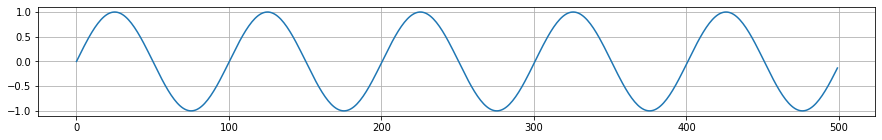

In [ ]:
import matplotlib.pyplot as plt

def plot_signal(signal, start=0, end=500):
  plt.figure(figsize=(15, 2))
  plt.grid(True)
  plt.plot(signal[start:end])
  plt.show()

plot_signal(signal_440)

In [ ]:
signal_220 = sinusoid(220, 2)

Audio(signal_220, rate=44100)

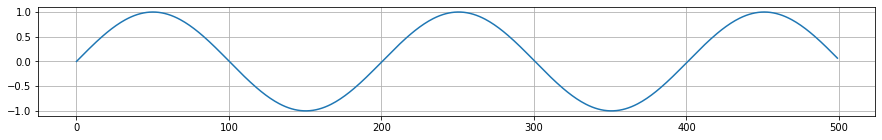

In [ ]:
plot_signal(signal_220)

# Measures of Amplitude

In [ ]:
def peak_amplitude(signal, start, end):
  return max(signal[start:end])

peak_amplitude(signal_440, 0, 500)

0.9999970233802774

In [ ]:
peak_amplitude(signal_220, 0, 25)

0.6833060083855796

In [ ]:
def mean_power(signal, start, end):
  total = 0

  for sample in signal[start:end]:
    total += sample ** 2

  return (1 / (end - start)) * total

mean_power(signal_220, 0, 500)

0.5011281096604824

In [ ]:
import math

def rms_amplitude(signal, start, end):
  return math.sqrt(mean_power(signal, start, end))

rms_amplitude(signal_220, 0, 500)

0.7079040257411187

In [ ]:
rms_amplitude(signal_440, 0, 500) * math.sqrt(2)

1.0011197788197614

# Units of Amplitude

In [ ]:
def decibels(amplitude):
  result = 20 * math.log10(amplitude / 0.00001)
  return round(result)

decibels(0.9999970233802774)

100

In [ ]:
decibels(0.7079040257411187)

97

# Frequency

In [ ]:
def freq_to_midi(freq):
  result = 69 + 12 * math.log2(freq / 440)
  return round(result)

freq_to_midi(261.626)

60

In [ ]:
def midi_to_freq(midi):
  return 440 * 2 ** ((midi - 69) / 12)

midi_to_freq(60)

261.6255653005986

# Synthesizing a Sinusoid & Controlling Amplitude

In [ ]:
ones = np.ones(44100)
quarters = np.full(44100, 0.25)

amp = np.concatenate([ones, quarters], axis=None)

Audio(amp * signal_440, rate=44100)

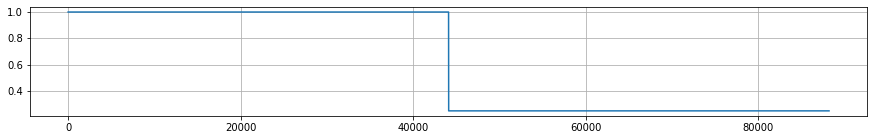

In [ ]:
plot_signal(amp, end=88200)

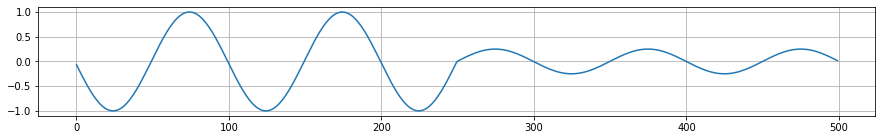

In [ ]:
plot_signal(amp * signal_440, start=44100-250, end=44100+250)

In [ ]:
ones_2 = np.ones(88200 // 3)
decay = np.linspace(1, 0.25, 88200 // 3)
quarters_2 = np.full(88200 // 3, 0.25)

amp2 = np.concatenate([ones_2, decay, quarters_2], axis=None)

Audio(amp2 * signal_440, rate=44100)

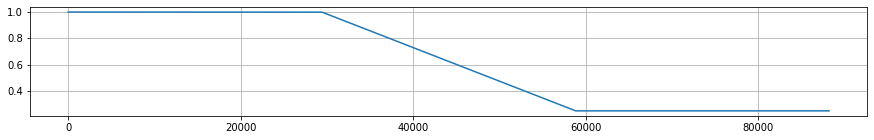

In [ ]:
plot_signal(amp2, end=88200)

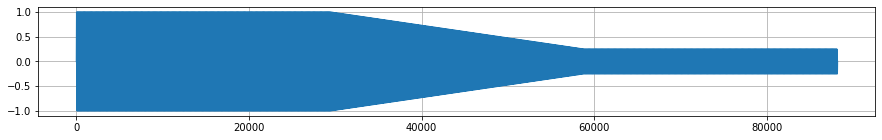

In [ ]:
plot_signal(amp2 * signal_440, end=88200)

# Periodic Signals

In [ ]:
signal_c = sinusoid(midi_to_freq(60), 2)
signal_g = sinusoid(midi_to_freq(67), 2)

Audio(signal_c + signal_g, rate=44100)

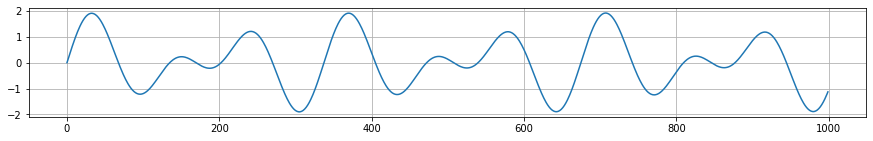

In [ ]:
plot_signal(signal_c + signal_g, end=1000)